<a href="https://colab.research.google.com/github/ani-sh2301/ML1/blob/main/Schiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, r2_score

from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/Schizophrenia/data.csv')

In [ ]:
df.head()

,subreddit,author,date,post,schiz_indicator,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,schizophrenia,SchizophrenicB,2019/08/29,"Just formally diagnosed about two weeks ago, b...",1,6.122667,8.943189,6.366389,69.456250,69.111111,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000
1,schizophrenia,edwardmuch,2019/01/09,Too frightened to change my medication!!! I ta...,1,3.590595,6.438486,4.485714,79.525952,77.928571,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000
2,schizophrenia,Wish_I_Could_Swim,2020/04/03,I don't know how to get honest answers out of ...,1,7.968520,5.759995,7.679564,79.386192,63.623116,...,0.0,0.0,0.0,0.000000,0.25973,0.0,0.0,0.0,0.0,0.082348
3,personalfinance,MoneyJ2k,2020/04/12,Is there ever a good reason to consistently ea...,0,3.766234,5.156070,5.407358,79.870778,72.220676,...,0.0,0.0,0.0,0.035204,0.00000,0.0,0.0,0.0,0.0,0.093420
4,schizophrenia,yaniraaaa,2020/03/06,Psychotic episodes? I have schizophrenia so I’...,1,6.478182,9.483280,6.578788,67.488182,68.696970,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
df.shape

(17423, 351)

In [ ]:
#features to be used
col = ['post', 'n_long_words', 'n_monosyllable_words', 'n_polysyllable_words', 'n_syllables', 'schiz_indicator']

data = df[col]

In [ ]:
data['post'].iloc[1::20]

1        Too frightened to change my medication!!! I ta...
21       Thoughts on "gangstalking" and the r/gangstalk...
41       Does it ever feel like you life is just over f...
61       Asking for a favour I just wanna start off by ...
81       Is there anyway of maybe finding schizophrenic...
                               ...                        
17341    Online Schizophrenia Support Group This is a n...
17361    What's your opinion of April Fool's Day? Love ...
17381    Voices Inside My Head Won't Leave I’ve tried m...
17401    My parents want power of attorney over me I do...
17421    Disorganized thinking and seizures Hello,\n\nI...
Name: post, Length: 872, dtype: object

In [ ]:
data['post'] = data['post'].str.replace('â€™', '\'').str.lower()

<ipython-input-145-4a25b218fb0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['post'] = data['post'].str.replace('â€™', '\'').str.lower()


In [ ]:
data.shape

(17423, 6)

In [ ]:
data.head()

,post,n_long_words,n_monosyllable_words,n_polysyllable_words,n_syllables,schiz_indicator
0,"just formally diagnosed about two weeks ago, b...",20,67,13,134,1
1,too frightened to change my medication!!! i ta...,5,22,3,39,1
2,i don't know how to get honest answers out of ...,27,163,11,247,1
3,is there ever a good reason to consistently ea...,73,382,35,675,0
4,psychotic episodes? i have schizophrenia so i’...,18,44,7,100,1


# Splitting the data

In [ ]:
X_data = data['post']
Y_data = data['schiz_indicator']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

In [ ]:
print('x_train: ', len(x_train))
print('y_train: ', len(y_train))
print('x_test: ', len(x_test))
print('y_test: ', len(y_test))

x_train:  12196
y_train:  12196
x_test:  5227
y_test:  5227


# NB classifier

In [ ]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
y_pred_NB = nb_classifier.predict(X_test_vec)

In [ ]:
precision = precision_score(y_test, y_pred_NB)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_NB)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_NB)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred_NB)
print("F1 Score:", f1)

r2 = r2_score(y_test, y_pred_NB)
print("R2 Score:", r2)

Precision: 0.7847785402370555
Recall: 0.9570178775199696
Accuracy: 0.8463745934570499
F1 Score: 0.862382176520994
R2 Score: 0.385476758755528


# SVM

In [ ]:
#training a svm classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_SVM = svm_classifier.predict(X_test_vec)

In [ ]:
precision = precision_score(y_test, y_pred_SVM)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_SVM)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_SVM)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred_SVM)
print("F1 Score:", f1)

r2 = r2_score(y_test, y_pred_SVM)
print("R2 Score:", r2)

Precision: 0.9015524422567209
Recall: 0.9056675542031191
Accuracy: 0.9028123206428161
F1 Score: 0.9036053130929792
R2 Score: 0.6112356082787151


# Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_RF = rf_classifier.predict(X_test_vec)

In [ ]:
precision = precision_score(y_test, y_pred_RF)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_RF)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_RF)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred_RF)
print("F1 Score:", f1)

r2 = r2_score(y_test, y_pred_RF)
print("R2 Score:", r2)

Precision: 0.8984078847611827
Recall: 0.9014834537847091
Accuracy: 0.8991773483833939
F1 Score: 0.8999430415796468
R2 Score: 0.5966952078009505


# Logistic Regression

In [ ]:
logreg_model = LogisticRegression()
history=logreg_model.fit(X_train_vec, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_LR = logreg_model.predict(X_test_vec)

In [ ]:
precision = precision_score(y_test, y_pred_LR)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_LR)
print("Recall:", recall)

accuracy = accuracy_score(y_test, y_pred_LR)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred_LR)
print("F1 Score:", f1)

r2 = r2_score(y_test, y_pred_LR)
print("R2 Score:", r2)

Precision: 0.933359466875735
Recall: 0.9056675542031191
Accuracy: 0.9200306102927109
F1 Score: 0.9193050193050194
R2 Score: 0.6801111894891789


# RNN

In [ ]:
train, val, test =np.split(data.sample(frac=1), [int(0.8*len(data)), int(0.9*len(data))])

In [ ]:
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

13938 training examples
1742 validation examples
1743 test examples


In [ ]:

train.head()

,post,n_long_words,n_monosyllable_words,n_polysyllable_words,n_syllables,schiz_indicator
15793,my dishonesty and my depression are getting in...,37,269,14,411,0
10696,not qualified... i ain't gonna go thru my who...,31,212,12,324,0
11401,schizophrenia vyvanse i used to take vyvanse a...,15,26,7,65,1
16031,tips what do ya’ll do when you feel yourself g...,10,39,3,70,0
6894,what is having schizophrenia like? i feel like...,3,19,0,31,1


In [ ]:
#to convert into tensorflow dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('schiz_indicator')
  df = df['post']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE) #to optimize, fast things
  return ds

In [ ]:
#to convert into tensorflow dataframe without target variable
def df_to_dataset2(dataframe, batch_size=1024):
  df = dataframe.copy()
  df = df['post']
  ds = tf.data.Dataset.from_tensor_slices((df))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train_data=df_to_dataset(train)
val_data=df_to_dataset(val)
test_data=df_to_dataset(test)

In [ ]:
list(train_data)[0][0]

<tf.Tensor: shape=(1024,), dtype=string, numpy=
array([b'schizophrenia how to fight blank mind? i have a blank mind from schizophrenia in which i can\xe2\x80\x99t think like no inner monologue and no memory. and i just feel like i\xe2\x80\x99m controlled by my voices and i do what they want me to do. and i\xe2\x80\x99m just so bored with life. like i don\xe2\x80\x99t want to die but i am just so bored doing nothing each and every day and it\xe2\x80\x99s literally impossible for me to think about suicide since i can\xe2\x80\x99t think. plus i would never commit suicide i\xe2\x80\x99m a christian and even though it feels like god has abandoned me. has anyone had success in fighting this the negative symptom of blank mind? any by the way my voices are very smart and creative smarter than i was back when i was a normal and told me the most elaborate story i ever heard about myself and showed me very vivid pictures of what they were talking about. sorry this post is kinda everywhere i can\x

In [ ]:
#using embedding to convert text to vector
embedding= 'https://tfhub.dev/google/nnlm-en-dim50/2'
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.7807951 , -0.07422909, -0.21717785, ..., -0.45096916,
         0.04796094, -0.2634882 ],
       [ 0.82496154,  0.16544168,  0.0417018 , ...,  0.04557968,
         0.3010674 ,  0.2605274 ],
       [ 0.5547437 , -0.18792981, -0.14624812, ...,  0.09803146,
         0.434315  ,  0.26878715],
       ...,
       [ 0.45574853, -0.11541049, -0.20107321, ..., -0.4676312 ,
         0.31512922,  0.00670289],
       [ 1.141343  , -0.22588561, -0.15040499, ..., -0.3234773 ,
        -0.05456677, -0.03587393],
       [ 1.8287596 , -0.0668752 , -0.3137865 , ..., -0.5357969 ,
         0.09869067,  0.08637771]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )

In [ ]:
model.evaluate(train_data)

14/14 [==============================] - 1s 20ms/step - loss: 0.6841 - accuracy: 0.5475


[0.6840726137161255, 0.5474960803985596]

In [ ]:
history = model.fit(train_data, epochs=12, validation_data= val_data)

Epoch 1/12
14/14 [==============================] - 5s 217ms/step - loss: 0.6836 - accuracy: 0.5603 - val_loss: 0.6500 - val_accuracy: 0.7067
Epoch 2/12
14/14 [==============================] - 2s 172ms/step - loss: 0.6528 - accuracy: 0.6271 - val_loss: 0.6206 - val_accuracy: 0.7451
Epoch 3/12
14/14 [==============================] - 3s 192ms/step - loss: 0.6219 - accuracy: 0.6745 - val_loss: 0.5783 - val_accuracy: 0.7755
Epoch 4/12
14/14 [==============================] - 2s 171ms/step - loss: 0.5811 - accuracy: 0.7130 - val_loss: 0.5274 - val_accuracy: 0.8008
Epoch 5/12
14/14 [==============================] - 2s 164ms/step - loss: 0.5416 - accuracy: 0.7465 - val_loss: 0.4711 - val_accuracy: 0.8134
Epoch 6/12
14/14 [==============================] - 3s 255ms/step - loss: 0.4872 - accuracy: 0.7895 - val_loss: 0.4210 - val_accuracy: 0.8307
Epoch 7/12
14/14 [==============================] - 2s 161ms/step - loss: 0.4299 - accuracy: 0.8231 - val_loss: 0.3669 - val_accuracy: 0.8502
Epoch 

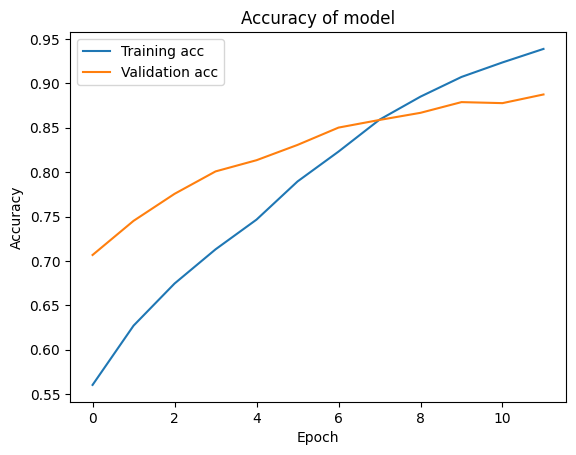

In [ ]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Accuracy of model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

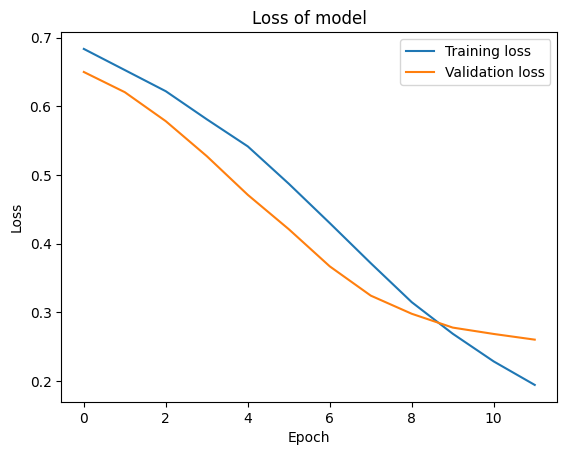

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss of model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 0s 20ms/step - loss: 0.2750 - accuracy: 0.8858


[0.2750481069087982, 0.8858290314674377]

In [ ]:
test.columns

Index(['post', 'n_long_words', 'n_monosyllable_words', 'n_polysyllable_words',
       'n_syllables', 'schiz_indicator'],
      dtype='object')

In [ ]:
test1 = df_to_dataset2(test)

NameError: name 'df_to_dataset2' is not defined

In [ ]:
y_pred_RN = model.predict(test1)

2/2 [==============================] - 0s 16ms/step


In [ ]:
y_pred_RN = [0 if i<0.5 else 1 for i in y_pred_RN ]

In [ ]:
y_pred_RN[20:25]

[0, 1, 1, 1, 0]

In [ ]:
test['schiz_indicator'][20:25]

5487     0
15825    1
538      1
3657     0
3063     0
Name: schiz_indicator, dtype: int64

In [ ]:

conf_matrix = confusion_matrix(test['schiz_indicator'], y_pred_RN)
conf_matrix

array([[774, 117],
       [ 82, 770]])

In [ ]:
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

Sensitivity: 0.903755868544601


In [ ]:


precision = precision_score(test['schiz_indicator'], y_pred_RN)
print("Precision:", precision)

recall = recall_score(test['schiz_indicator'], y_pred_RN)
print("Recall:", recall)

accuracy = accuracy_score(test['schiz_indicator'], y_pred_RN)
print("Accuracy:", accuracy)

f1 = f1_score(test['schiz_indicator'], y_pred_RN)
print("F1 Score:", f1)

r2 = r2_score(test['schiz_indicator'], y_pred_RN)
print("R2 Score:", r2)

Precision: 0.8680947012401353
Recall: 0.903755868544601
Accuracy: 0.8858290304073436
F1 Score: 0.885566417481311
R2 Score: 0.543087368204739


In [ ]:
#model.save('schiz_model.keras')

# LSTM

In [ ]:
encoder= tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [ ]:
vocab= np.array(encoder.get_vocabulary())
vocab[:30]

array(['', '[UNK]', 'i', 'to', 'and', 'the', 'a', 'my', 'of', 'in', 'it',
       'that', 'is', 'me', 'for', 'but', 'have', 'this', 'with', 'was',
       'on', 'im', 'so', 'just', 'or', 'like', 'you', 'be', 'not', 'if'],
      dtype='<U15')

In [ ]:
model_lstm=tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=32, mask_zero=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )

In [ ]:
model_lstm.evaluate(train_data)

14/14 [==============================] - 3s 71ms/step - loss: 0.6933 - accuracy: 0.4912


[0.693336546421051, 0.49124693870544434]

In [ ]:
history_lstm = model_lstm.fit(train_data, epochs=20, validation_data= val_data)

Epoch 1/20
14/14 [==============================] - 7s 157ms/step - loss: 0.6917 - accuracy: 0.5481 - val_loss: 0.6887 - val_accuracy: 0.5867
Epoch 2/20
14/14 [==============================] - 2s 146ms/step - loss: 0.6757 - accuracy: 0.6496 - val_loss: 0.6334 - val_accuracy: 0.7239
Epoch 3/20
14/14 [==============================] - 2s 136ms/step - loss: 0.5658 - accuracy: 0.7592 - val_loss: 0.5238 - val_accuracy: 0.7778
Epoch 4/20
14/14 [==============================] - 2s 180ms/step - loss: 0.5133 - accuracy: 0.8055 - val_loss: 0.4802 - val_accuracy: 0.8123
Epoch 5/20
14/14 [==============================] - 2s 161ms/step - loss: 0.4664 - accuracy: 0.8334 - val_loss: 0.6113 - val_accuracy: 0.7325
Epoch 6/20
14/14 [==============================] - 2s 151ms/step - loss: 0.6026 - accuracy: 0.7369 - val_loss: 0.5077 - val_accuracy: 0.7635
Epoch 7/20
14/14 [==============================] - 2s 135ms/step - loss: 0.4712 - accuracy: 0.8015 - val_loss: 0.4566 - val_accuracy: 0.8100
Epoch 

In [ ]:
model_lstm.evaluate(test_data)

2/2 [==============================] - 0s 51ms/step - loss: 0.3538 - accuracy: 0.8703


[0.3537735342979431, 0.870338499546051]

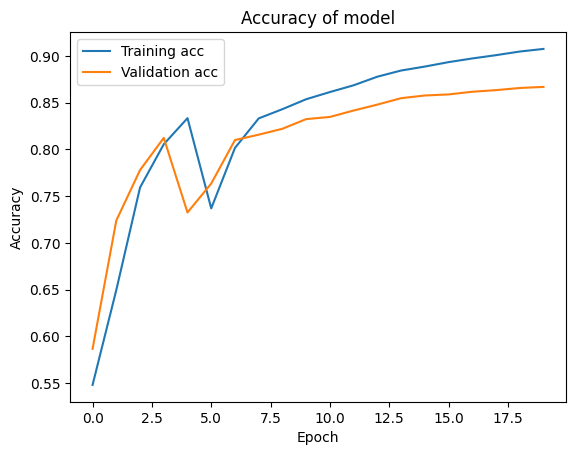

In [ ]:
plt.plot(history_lstm.history['accuracy'], label='Training acc')
plt.plot(history_lstm.history['val_accuracy'], label='Validation acc')
plt.title('Accuracy of model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

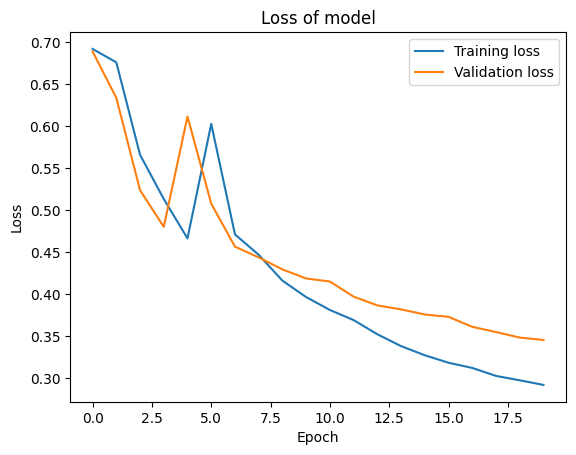

In [ ]:
plt.plot(history_lstm.history['loss'], label='Training loss')
plt.plot(history_lstm.history['val_loss'], label='Validation loss')
plt.title('Loss of model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred_LSTM = model.predict(test1)

2/2 [==============================] - 0s 27ms/step


In [ ]:
y_pred_LSTM = [0 if i<0.5 else 1 for i in y_pred_LSTM ]

In [ ]:
conf_matrix = confusion_matrix(test['schiz_indicator'], y_pred_LSTM)
conf_matrix

array([[774, 117],
       [ 82, 770]])

In [ ]:
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

Sensitivity: 0.903755868544601


In [ ]:
precision = precision_score(test['schiz_indicator'], y_pred_LSTM)
print("Precision:", precision)

recall = recall_score(test['schiz_indicator'], y_pred_LSTM)
print("Recall:", recall)

accuracy = accuracy_score(test['schiz_indicator'], y_pred_LSTM)
print("Accuracy:", accuracy)

f1 = f1_score(test['schiz_indicator'], y_pred_LSTM)
print("F1 Score:", f1)

r2 = r2_score(test['schiz_indicator'], y_pred_LSTM)
print("R2 Score:", r2)

Precision: 0.8680947012401353
Recall: 0.903755868544601
Accuracy: 0.8858290304073436
F1 Score: 0.885566417481311
R2 Score: 0.543087368204739


# Model summries

RNN

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_5 (Dense)             (None, 16)                816       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191705 (183.84 MB)
Trainable params: 4

LSTM

In [ ]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, None)              0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, None, 32)          64000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                      

# Model Comparison

## Accuracy, Precision, Recall comparison

In [ ]:
model_name=['Naive Bayes', 'SVM', 'Logistic', 'Random Forest', 'RNN', 'LSTM']

In [ ]:
accuracy = [0.8463, 0.902, 0.899, 0.920, 0.897, 0.897]
precision = [0.784, 0.901, 0.898, 0.933, 0.904, 0.904]
f1_score = [0.862, 0.903, 0.899, 0.919, 0.896, 0.896]
R2_score = [0.385, 0.611, 0.596, 0.680, 0.591,0.591]

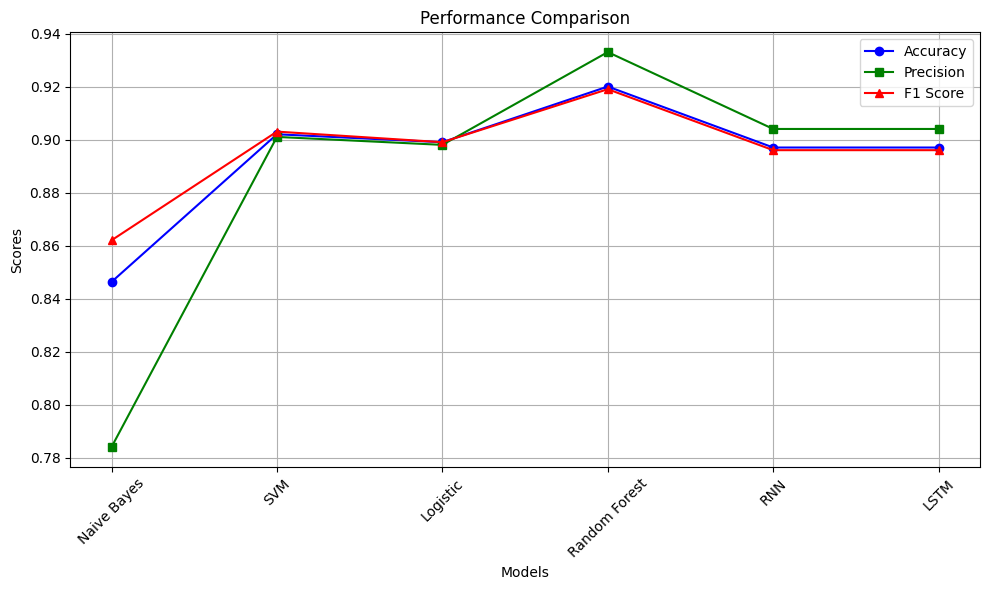

In [ ]:

plt.figure(figsize=(10, 6))

plt.plot(model_name, accuracy, marker='o', label='Accuracy', color='blue')

plt.plot(model_name, precision, marker='s', label='Precision', color='green')

plt.plot(model_name, f1_score, marker='^', label='F1 Score', color='red')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


R2 score

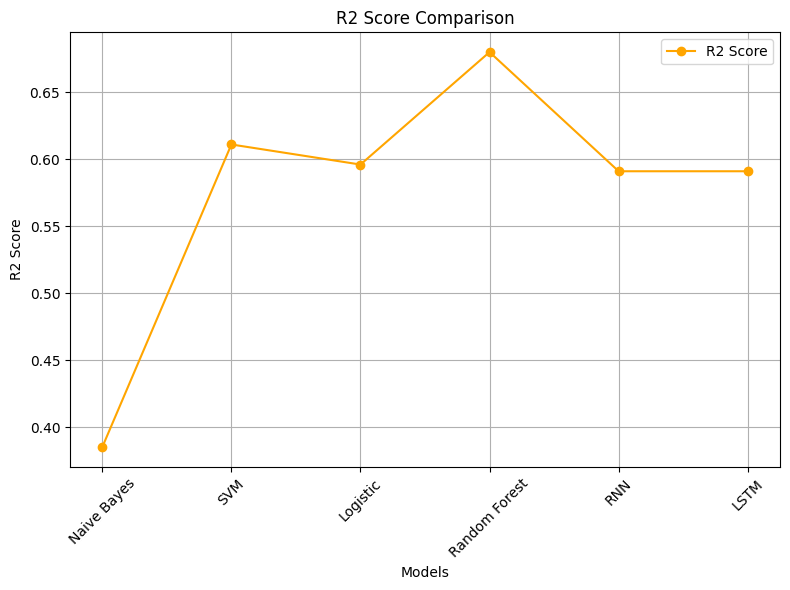

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(model_name, R2_score, marker='o', label='R2 Score', color='orange')

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ROC curve

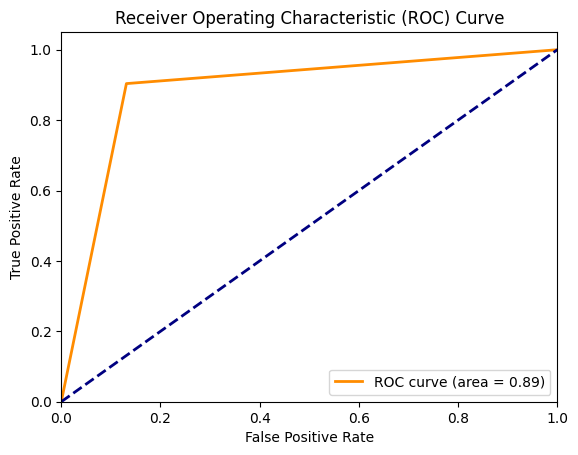

In [ ]:
#LSTM
fpr, tpr, thresholds = roc_curve(test['schiz_indicator'], y_pred_LSTM)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

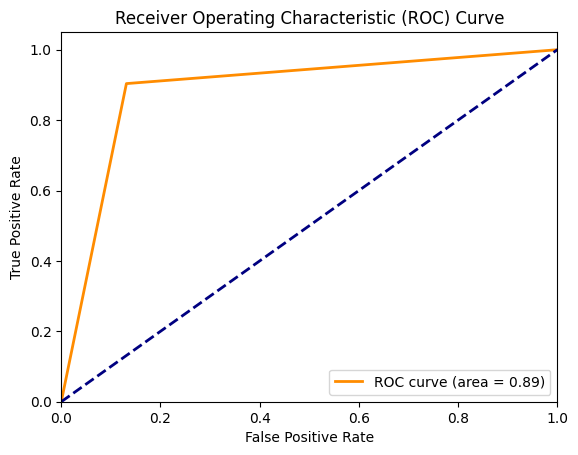

In [ ]:
#RNN
fpr, tpr, thresholds = roc_curve(test['schiz_indicator'], y_pred_RN)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_preds=[]
y_preds.append(y_pred_NB)
y_preds.append(y_pred_SVM)
y_preds.append(y_pred_LR)
y_preds.append(y_pred_RF)

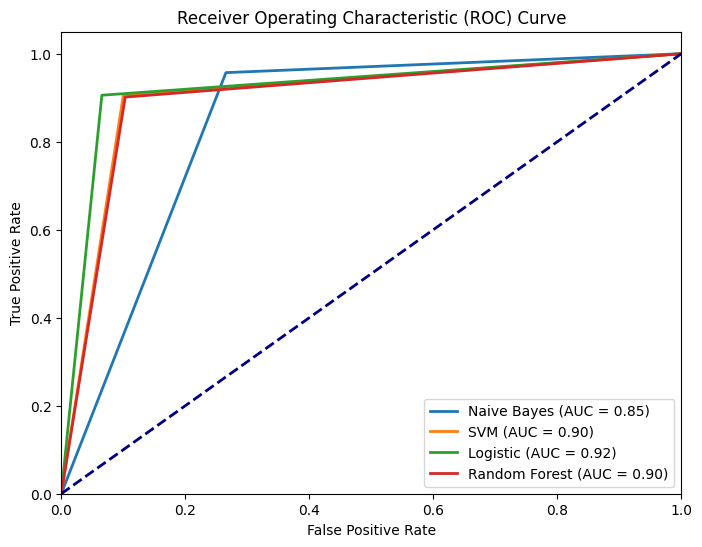

In [ ]:
plt.figure(figsize=(8, 6))

for i, y_pred in enumerate(y_preds):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()